In [2]:
import numpy as np
import sqlite3 as sq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
connection = sq.connect("./measurements-29-04.db")
def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d
connection.row_factory = dict_factory

In [4]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def normalizedRtt(items):
    result = []
    for data in items:
        result.append(data["query_time"]/data["rtt"])
    return result

def calculateAverageQueryTime(items):
    sum_num = 0
    for data in items:
        sum_num += data
    return sum_num/len(items)

74 257.1419930999999


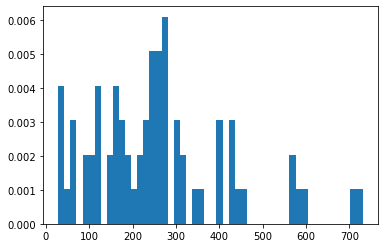

In [5]:
cursor = connection.cursor()
sql = "SELECT * FROM dns_measurements WHERE protocol = 'udp' AND r_code = 0"
cursor.execute(sql)
items = list(cursor.fetchall())
withoutOutliers = reject_outliers(np.asarray(list(map(lambda x: x["total_time"]/1000000, items))))
print(len(items), calculateAverageQueryTime(withoutOutliers))
plt.hist(withoutOutliers, density=True, bins=50)
cursor.close()

75 317.8795691369863


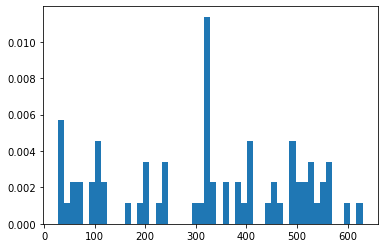

In [6]:
cursor = connection.cursor()
sql = "SELECT * FROM dns_measurements WHERE protocol = 'tcp' AND r_code = 0"
cursor.execute(sql)
items = list(cursor.fetchall())
withoutOutliers = reject_outliers(np.asarray(list(map(lambda x: x["total_time"]/1000000, items))))
print(len(items), calculateAverageQueryTime(withoutOutliers))
plt.hist(withoutOutliers, density=True, bins=50)
cursor.close()

113 589.3316127767856


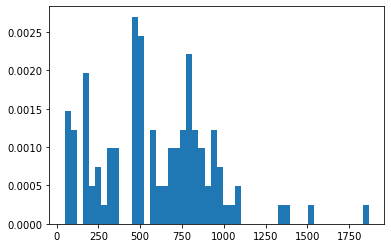

In [7]:
cursor = connection.cursor()
sql = "SELECT * FROM dns_measurements WHERE protocol = 'tls' AND r_code = 0"
cursor.execute(sql)
items = list(cursor.fetchall())
withoutOutliers = reject_outliers(np.asarray(list(map(lambda x: x["total_time"]/1000000, items))))
print(len(items), calculateAverageQueryTime(withoutOutliers))
plt.hist(withoutOutliers, density=True, bins=50)
cursor.close()

63 494.06973854838714


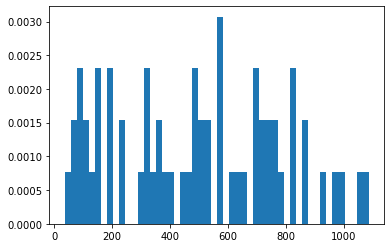

In [8]:
cursor = connection.cursor()
sql = "SELECT * FROM dns_measurements WHERE protocol = 'https' AND r_code = 0"
cursor.execute(sql)
items = list(cursor.fetchall())
withoutOutliers = reject_outliers(np.asarray(list(map(lambda x: x["total_time"]/1000000, items))))
print(len(items), calculateAverageQueryTime(withoutOutliers))
plt.hist(withoutOutliers, density=True, bins=50)
cursor.close()

155 576.720931424836


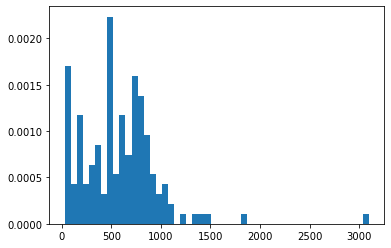

In [9]:
cursor = connection.cursor()
sql = "SELECT * FROM dns_measurements WHERE protocol = 'quic' AND r_code = 0"
cursor.execute(sql)
items = list(cursor.fetchall())
withoutOutliers = reject_outliers(np.asarray(list(map(lambda x: x["total_time"]/1000000, items))))
print(len(items), calculateAverageQueryTime(withoutOutliers))
plt.hist(withoutOutliers, density=True, bins=50)
cursor.close()

# Error Analysis

## UDP

In [69]:
cursor = connection.cursor()
sql = "SELECT *, servers.rtt FROM measurements JOIN servers ON measurements.server_id=servers.ip WHERE protocol = 'udp' AND error IS NOT NULL"
cursor.execute(sql)
items = list(cursor.fetchall())

In [77]:
errors = map(lambda x: x["error"] if "error" in x else None, items)

## TCP

In [79]:
cursor = connection.cursor()
sql = "SELECT *, servers.rtt FROM measurements JOIN servers ON measurements.server_id=servers.ip WHERE protocol = 'tcp' AND error IS NOT NULL"
cursor.execute(sql)
items = list(cursor.fetchall())
errors = map(lambda x: x["error"] if "error" in x else None, items)

In [81]:
print(list(errors))

['dial tcp 180.76.76.76:53: i/o timeout', 'dial tcp 85.132.85.85:53: i/o timeout', 'dial tcp 62.212.154.152:53: i/o timeout', 'dial tcp 193.252.10.2:53: connectex: No connection could be made because the target machine actively refused it.', 'dial tcp 208.89.131.199:53: connectex: No connection could be made because the target machine actively refused it.', 'read tcp 192.168.178.67:56227->200.46.199.56:53: i/o timeout', 'read tcp 192.168.178.67:56276->190.108.85.3:53: i/o timeout', 'dial tcp 194.179.1.100:53: i/o timeout', 'dial tcp 200.119.192.58:53: connectex: No connection could be made because the target machine actively refused it.', 'read tcp 192.168.178.67:56318->69.24.197.9:53: wsarecv: An existing connection was forcibly closed by the remote host.', 'read tcp 192.168.178.67:56359->74.120.24.129:53: wsarecv: An existing connection was forcibly closed by the remote host.', 'read tcp 192.168.178.67:56374->74.120.24.81:53: i/o timeout', 'dial tcp 2.228.121.163:53: i/o timeout', 'r